# Dimensionality reducion on MNIST digit data

In [1]:
# %pip install python-mnist
%matplotlib inline

import time
import sys
import tensorflow as tf
from keras.datasets import mnist
from sklearn.datasets import fetch_openml
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.manifold import TSNE

import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning)


In [2]:
# Load the data

(X_train,y_train),(X_test,y_test) = mnist.load_data()
print("Train data")
print(f"X Train: {X_train.shape}")
print(f"y train: {y_train.shape}")
print("*"*100)
print("Test data")
print(f"X Test: {X_test.shape}")
print(f"Y Text: {y_test.shape}")


Train data
X Train: (60000, 28, 28)
y train: (60000,)
****************************************************************************************************
Test data
X Test: (10000, 28, 28)
Y Text: (10000,)


From the data above, we can already tell a few things
<li>The Train and test data has 60000 and 10000 images respectively</li>
<li>The images have a dimention of 28 by 28 pixels</li>

#### join the datasets

In [3]:
X_data = np.vstack((X_train, X_test))
print("X data: {} ".format(X_data.shape))

Y_data = np.hstack((y_train, y_test))
print("Y data: {} ".format(Y_data.shape))

X data: (70000, 28, 28) 
Y data: (70000,) 


We have numpy arrays of X_data and Y_data

### Plotting the images

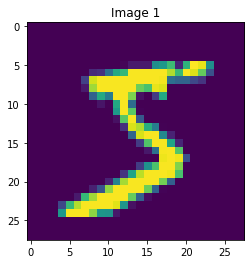

In [4]:
# Plot the first image on the data without alteing the colour

fig = plt.figure(figsize=(4,4))

plt.title("Image 1")
plt.imshow(X_data[0])
plt.show()

# display(X_train)

The above images show that the digit images are in <strong>RGB colour channels</strong> and we need to turn them into grayscale
<br>


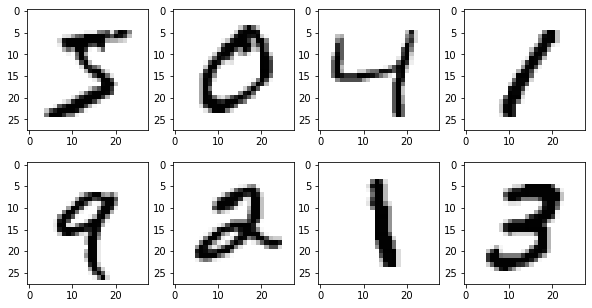

In [5]:
#  We can go further to plot the first few images
fig = plt.figure(figsize = (10,8))

for imgs in range(8):
    fig.add_subplot(340 + 1 + imgs)
    plt.imshow(X_data[imgs], cmap=plt.cm.binary) # we show the digits in a binary colour
    plt.tight_layout
plt.show()

In [6]:
# Lets see how the colour digits are distributed on the first image on the data.
for i in X_data[0]:
    print(i.tolist())

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 18, 18, 18, 126, 136, 175, 26, 166, 255, 247, 127, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 30, 36, 94, 154, 170, 253, 253, 253, 253, 253, 225, 172, 253, 242, 195, 64, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 49, 238, 253, 253, 253, 253, 253, 253, 253, 253, 251, 93, 82, 82, 56, 39, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 18, 219, 253, 253, 253, 253, 253, 198, 182, 247, 241, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 80, 156, 107, 253, 253, 205, 11, 0, 43, 154, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 14, 1, 154, 25

We can clearly seee that this is number 5

### Reashaping

Since we are interesed in dimentionality reduction, <br>we will need to reshape the data arrays into a <strong>single colour channel</strong>

In [14]:
# Reshape the X_train and X_test

display(X_data.shape)
X_data = X_data.reshape((X_data.shape[0], 28,28,-1))


print(f"After reshaping, X_data dim: {X_data.shape}")

(70000, 28, 28)

After reshaping, X_data dim: (70000, 28, 28, 1)


In [16]:
# label
print(X_data)

[[[[0. 1.]
   [1. 0.]]

  [[0. 1.]
   [1. 0.]]

  [[0. 1.]
   [1. 0.]]

  ...

  [[0. 1.]
   [1. 0.]]

  [[0. 1.]
   [1. 0.]]

  [[0. 1.]
   [1. 0.]]]


 [[[1. 0.]
   [0. 1.]]

  [[0. 1.]
   [1. 0.]]

  [[0. 1.]
   [1. 0.]]

  ...

  [[0. 1.]
   [1. 0.]]

  [[0. 1.]
   [1. 0.]]

  [[0. 1.]
   [1. 0.]]]


 [[[0. 1.]
   [1. 0.]]

  [[0. 1.]
   [1. 0.]]

  [[0. 1.]
   [1. 0.]]

  ...

  [[0. 1.]
   [1. 0.]]

  [[0. 1.]
   [1. 0.]]

  [[0. 1.]
   [1. 0.]]]


 ...


 [[[0. 1.]
   [1. 0.]]

  [[0. 1.]
   [1. 0.]]

  [[0. 1.]
   [1. 0.]]

  ...

  [[0. 1.]
   [1. 0.]]

  [[0. 1.]
   [1. 0.]]

  [[0. 1.]
   [1. 0.]]]


 [[[0. 1.]
   [1. 0.]]

  [[0. 1.]
   [1. 0.]]

  [[0. 1.]
   [1. 0.]]

  ...

  [[0. 1.]
   [1. 0.]]

  [[0. 1.]
   [1. 0.]]

  [[0. 1.]
   [1. 0.]]]


 [[[0. 1.]
   [1. 0.]]

  [[0. 1.]
   [1. 0.]]

  [[0. 1.]
   [1. 0.]]

  ...

  [[0. 1.]
   [1. 0.]]

  [[0. 1.]
   [1. 0.]]

  [[0. 1.]
   [1. 0.]]]]


#### Transforming the data into High dimention
<li>Part 1: Use the 10 categories and see the result</li>
<li>Part 2: Use the 784 fratures <strong>28 X 28 </strong> and see the result</li>

### Part 1: Using the 10 categorical digits

In [9]:
# One hot encodding and representation
lr = np.arange(10)

for label in range(10):
    one_hot = (lr==label).astype(np.int)
    print("label: ", label, " in one-hot representation: ", one_hot)
    
print('*'*100)


label:  0  in one-hot representation:  [1 0 0 0 0 0 0 0 0 0]
label:  1  in one-hot representation:  [0 1 0 0 0 0 0 0 0 0]
label:  2  in one-hot representation:  [0 0 1 0 0 0 0 0 0 0]
label:  3  in one-hot representation:  [0 0 0 1 0 0 0 0 0 0]
label:  4  in one-hot representation:  [0 0 0 0 1 0 0 0 0 0]
label:  5  in one-hot representation:  [0 0 0 0 0 1 0 0 0 0]
label:  6  in one-hot representation:  [0 0 0 0 0 0 1 0 0 0]
label:  7  in one-hot representation:  [0 0 0 0 0 0 0 1 0 0]
label:  8  in one-hot representation:  [0 0 0 0 0 0 0 0 1 0]
label:  9  in one-hot representation:  [0 0 0 0 0 0 0 0 0 1]
****************************************************************************************************


<ipython-input-9-d9ac401d42f1>:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  one_hot = (lr==label).astype(np.int)


In [13]:
Y_data = to_categorical(Y_data)
# Ytest = to_categorical(y_test)
print(Y_data)

[[[[0. 1.]
   [1. 0.]]

  [[0. 1.]
   [1. 0.]]

  [[0. 1.]
   [1. 0.]]

  ...

  [[0. 1.]
   [1. 0.]]

  [[0. 1.]
   [1. 0.]]

  [[0. 1.]
   [1. 0.]]]


 [[[1. 0.]
   [0. 1.]]

  [[0. 1.]
   [1. 0.]]

  [[0. 1.]
   [1. 0.]]

  ...

  [[0. 1.]
   [1. 0.]]

  [[0. 1.]
   [1. 0.]]

  [[0. 1.]
   [1. 0.]]]


 [[[0. 1.]
   [1. 0.]]

  [[0. 1.]
   [1. 0.]]

  [[0. 1.]
   [1. 0.]]

  ...

  [[0. 1.]
   [1. 0.]]

  [[0. 1.]
   [1. 0.]]

  [[0. 1.]
   [1. 0.]]]


 ...


 [[[0. 1.]
   [1. 0.]]

  [[0. 1.]
   [1. 0.]]

  [[0. 1.]
   [1. 0.]]

  ...

  [[0. 1.]
   [1. 0.]]

  [[0. 1.]
   [1. 0.]]

  [[0. 1.]
   [1. 0.]]]


 [[[0. 1.]
   [1. 0.]]

  [[0. 1.]
   [1. 0.]]

  [[0. 1.]
   [1. 0.]]

  ...

  [[0. 1.]
   [1. 0.]]

  [[0. 1.]
   [1. 0.]]

  [[0. 1.]
   [1. 0.]]]


 [[[0. 1.]
   [1. 0.]]

  [[0. 1.]
   [1. 0.]]

  [[0. 1.]
   [1. 0.]]

  ...

  [[0. 1.]
   [1. 0.]]

  [[0. 1.]
   [1. 0.]]

  [[0. 1.]
   [1. 0.]]]]


From the results above we can see that the Ytrain shape after one hot encoding we get 10 categories. <br>
This is because the digits range from 0 -9 which are 10 10 categories


In [ ]:
# creating labels
arr = Ytrain[0:12]
for i in arr:
    pos = np.where(i == 1)
    print(i, *pos)
#     print(indexed)


## Visualizaton using t-SNE

T-Dristribted Stochastic Neighbour Embedding (t-SNE) is a non linear dimentionality reduction techique that well suits vizualization of high dimension data especially on a 2D plot using conditional probalbility.<br>
t-SNE uses Gausian distribution

#### Converng data into a pandas dataframe for easier handling

In [ ]:
cols = np.arange(10)

train_df = pd.DataFrame(Ytrain, columns = cols)
train_df.head()

print('-'*100)
display(train_df.value_counts())

In [ ]:
# Function to compute t-SNE 
# def tSNE(dataframe):
start_time = time.time()
tsne = TSNE(n_components = 2, verbose=0, learning_rate=200, n_iter=500)
tsne_result = tsne.fit_transform(X=train_df)
end_time = time.time()
print("Learning completed in {} seconds".format(end_time - start_time))

    # return tsne_result


In [ ]:
tsne_df = pd.DataFrame({"t-SNE 1":tsne_result[:,0], "t-SNE 2":tsne_result[:,1]})
tsne_df.head()

In [ ]:
# Plotting the tsne data

fig, ax = plt.subplots(1, figsize=(15,10))
sns.scatterplot(x = 't-SNE 1', y= 't-SNE 2', data = tsne_df, ax = ax, s=20)
lim = (tsne_result.min()-5, tsne_result.max()+5)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')
ax.set_title('Part 1: t-SNE Visualization', fontsize = 16, weight = 'bold')
ax.legend(bbox_to_anchor = (1,1), loc =2, borderaxespad = 0.0)

### Part 2: Use the 784 features

In [ ]:
X,y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=True)
X = X/255.0

In [ ]:
print(X.shape)
print('='*50)
print(y.shape)

print(type(X))

In [ ]:
cols = [str(col) for col in range(X.shape[1])]

df = pd.DataFrame(X, columns = cols)
# print(type(df))
# # df = pd.concat(y,df)
# df['y'] = y
# df.drop(['y'], axis = 1)

df.shape

In [ ]:
display(df.head)
print('='*150)
display(df.isnull().sum())

In [ ]:
# cols = [str(i for i in range(784))]

# df[cols] = df[cols].astype('object')
# df[cols].fillna(0.0)
df.head()

In [ ]:
df = df.replace(np.NaN, 0)

In [ ]:
df.head()

In [ ]:

start_time = time.time()
tsne = TSNE(n_components = 2, verbose=1, learning_rate=200, n_iter=500)
tsne_result2 = tsne.fit_transform(df)
end_time = time.time()
print("Learning completed in {} seconds".format(end_time - start_time))

In [ ]:
display(tsne_result)

In [ ]:
tsne_df2 = pd.DataFrame({"t-SNE 1":tsne_result2[:,0], "t-SNE 2":tsne_result2[:,1], "label":df['y']})
fig, ax = plt.subplots(1, figsize=(15,10))
sns.scatterplot(x = 't-SNE 1', y= 't-SNE 2', hue = 'label', data = tsne_df2, ax = ax, s=20)
lim = (tsne_result2.min()-5, tsne_result2.max()+5)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')
ax.set_title('Part 2: t-SNE Visualization with 784 features', fontsize = 16, weight = 'bold')
ax.legend(bbox_to_anchor = (1,1), loc =2, borderaxespad = 0.0)

In [ ]:
# Since we will no longer need Mnist data, we can uninstall the package
%pip uninstall mnist
print("Successfully removed mnist")